<a href="https://colab.research.google.com/github/nkurinsky/THz-FTS/blob/master/python/Notebooks/MaxNoiseBBSpectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This simulation will combine a number of blackbody spectrums with indivual gaussian noise to each, and transformed as a combination, to see our ability to reconstruct filters with noise. This code will use the PSD frequency ouput list as the list of input frequencies, to avoid issues with the normalization. 

In [0]:
from pylab import *
from scipy import fft
import matplotlib.pyplot as plt
from scipy.signal import periodogram as psd
import numpy as np
from scipy.signal import find_peaks
from math import sqrt, sin
from cmath import pi


%matplotlib inline

In [28]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/BREAD Experiment/FTS Modeling/lib/')
from BlackbodyFunctions import *
from FTSFunctions import *

In [30]:
c_micron_per_second = 3e8 * 1e6
Hz_to_THz = 1e-12
lambda_or_nu = False

sigma = 5e-5 #watts

#for blackbody spectrum, decide frequeny range and number of frequency slices 
min_frequency = 0.1 #THz
max_frequency = 1500 #THz
num_slices = 2e5
frequency_slice_size = 0.01 #(max_frequency - min_frequency)/num_slices #THz
frequencies = arange(min_frequency, max_frequency, frequency_slice_size) #still in THz

x,y, weights_nofilter = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='no', sigma = 0)

<Figure size 3450x900 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

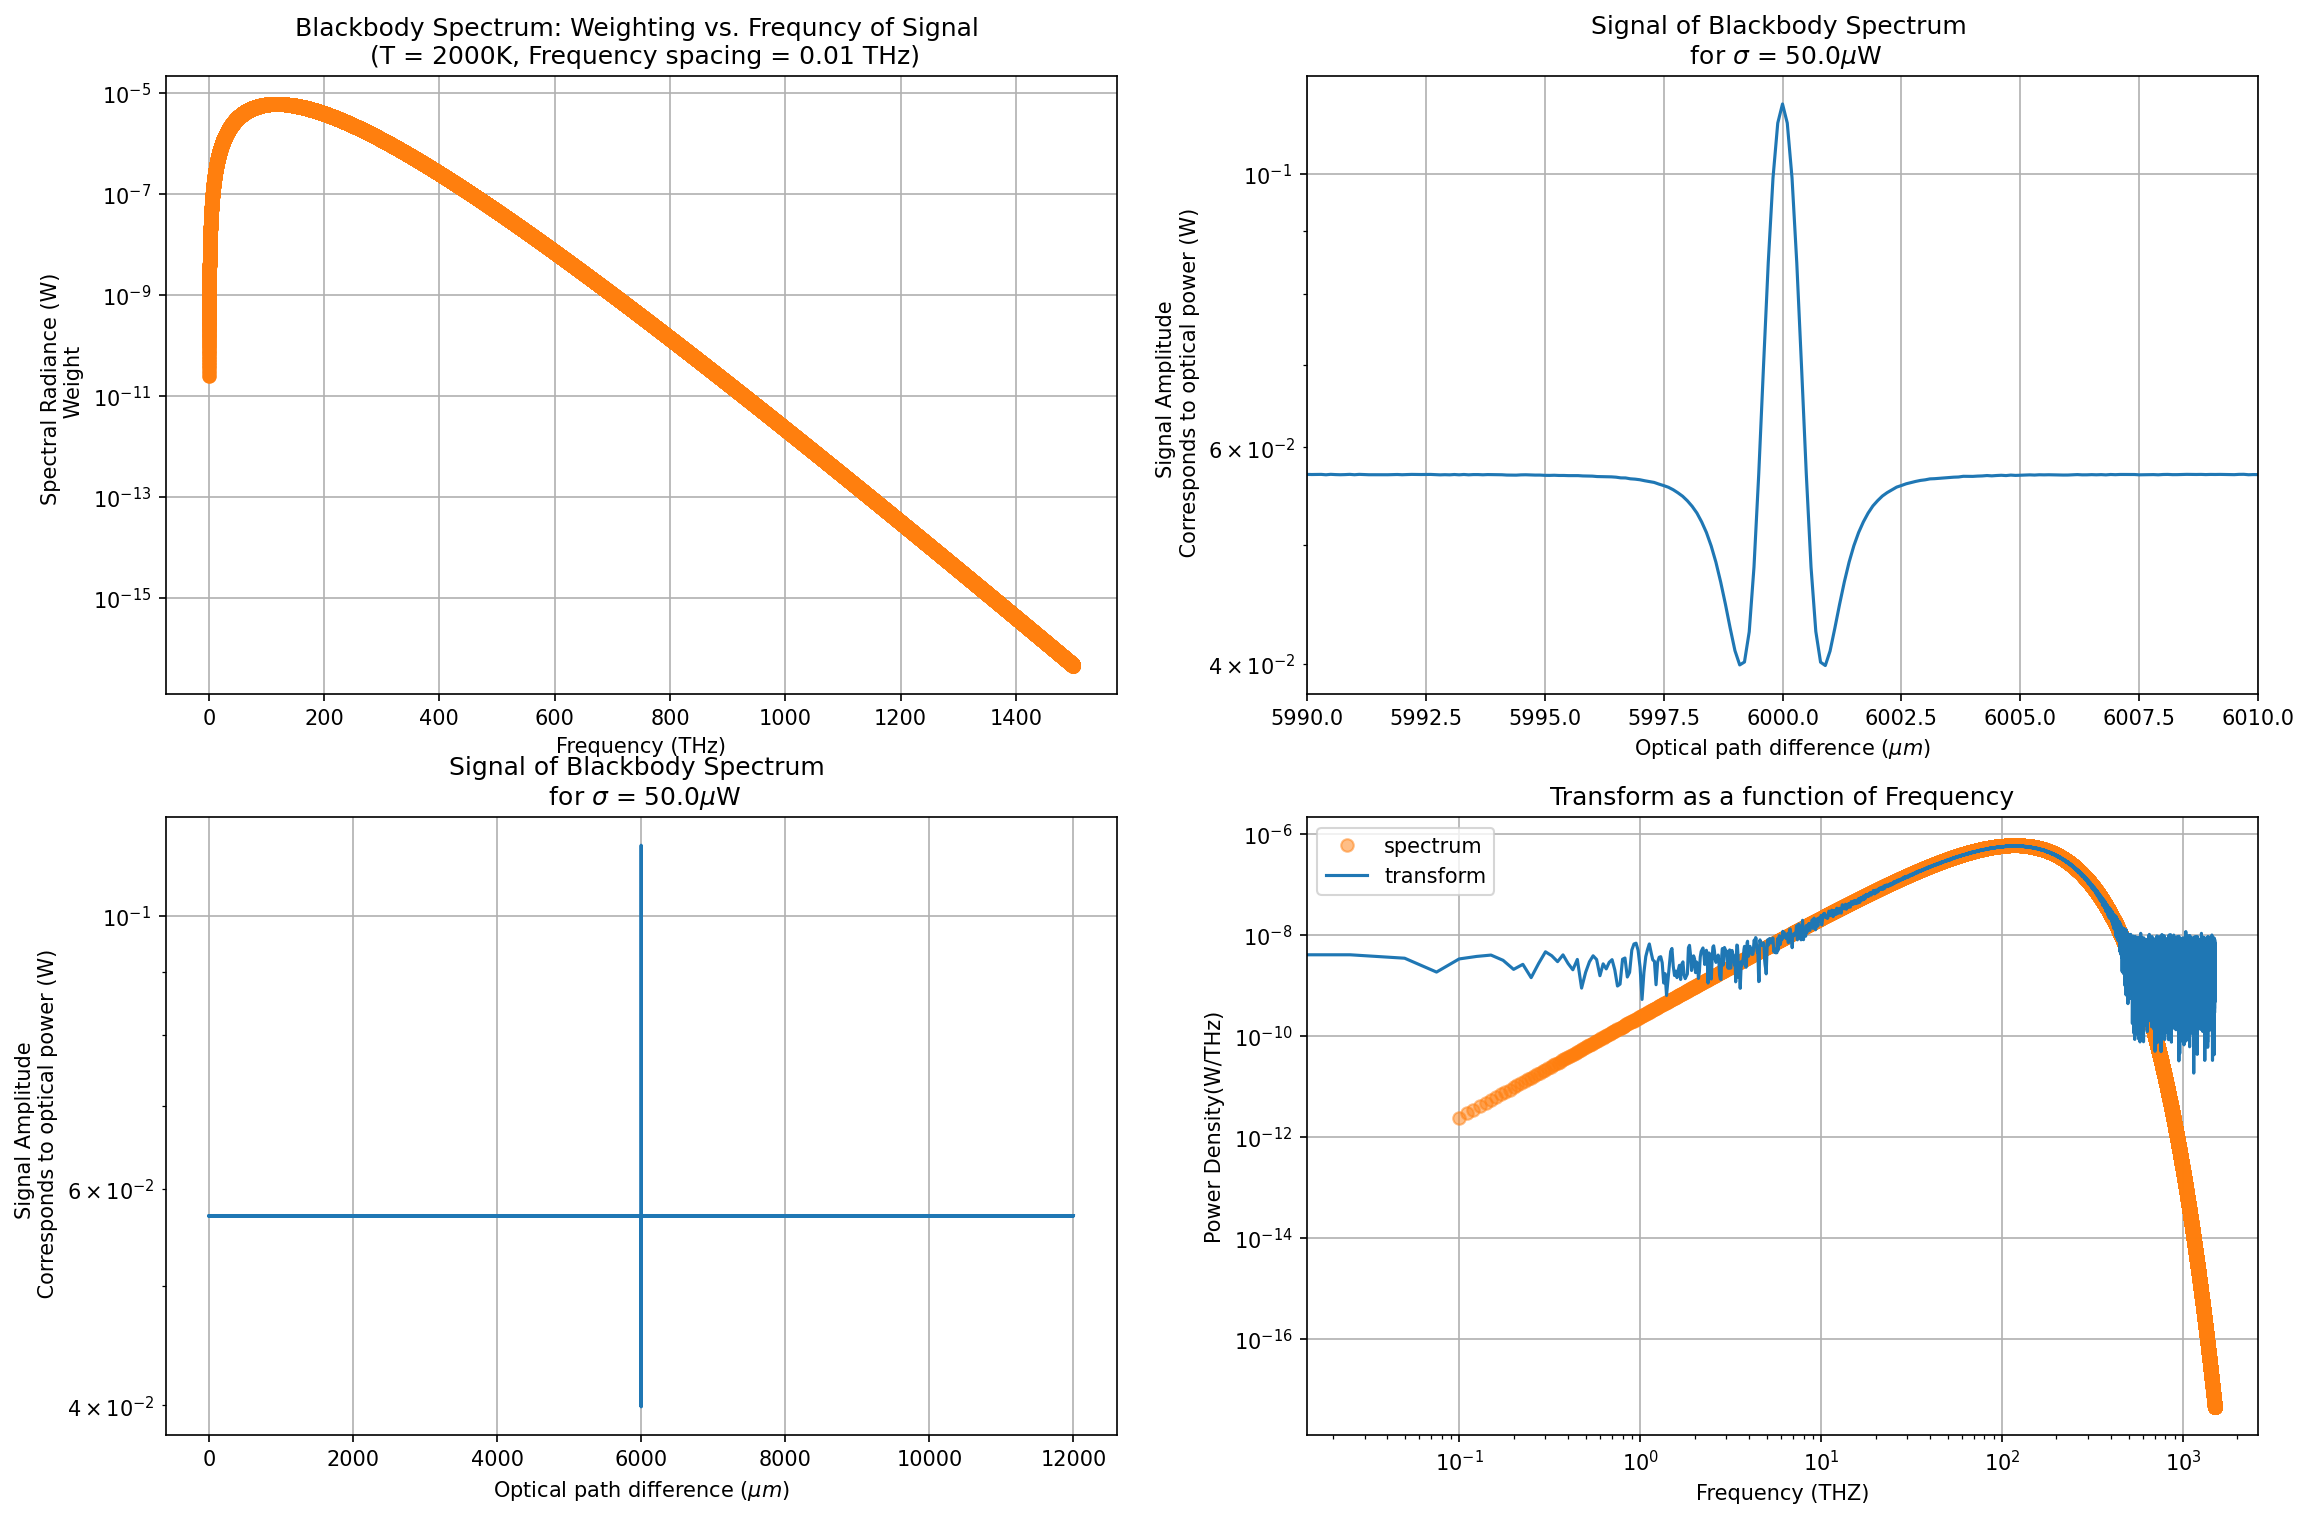

In [31]:
fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(frequencies, weights_nofilter , 'o', color='C1')

plt.subplot(2, 2, 2) 
y_total = y + np.random.rand(len(x))*sigma
plt.plot(x,y_total, color='C0')
  
plt.subplot(2, 2, 3)
plt.plot(x,y_total, color='C0')

plt.subplot(2, 2, 4)
frequency, spectrum_nofilter_noise = psd_frequency(y_total, 'parzen')
plt.semilogy(frequencies, weights_nofilter/df*1e9, 'o', alpha = 0.5, label = 'spectrum', color='C1')
plt.semilogy(frequency, spectrum_nofilter_noise, label='transform', color='C0')

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum \n for $\sigma$ = "+ str(round(sigma/1e-6,2)) + "$\mu$W")
plt.xlim(5990,6010)
plt.yscale('log')
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Signal of Blackbody Spectrum \n for $\sigma$ = "+ str(round(sigma/1e-6,2)) + "$\mu$W")
plt.grid(True)
plt.yscale('log')
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
df = (frequencies[1] - frequencies[0])/Hz_to_THz
plt.title("Transform as a function of Frequency")
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlabel('Frequency (THZ)')
plt.ylabel("Power Density(W/THz)")
plt.show()

Text(0, 0.5, 'Signal Amplitude \n Corresponds to optical power (W)')

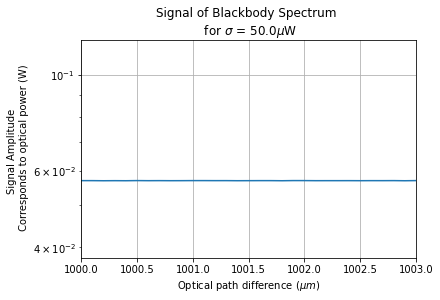

In [32]:
plt.plot(x,y_total, color='C0')
plt.grid(True)
plt.title("Signal of Blackbody Spectrum \n for $\sigma$ = "+ str(round(sigma/1e-6,2)) + "$\mu$W")
plt.xlim(1000,1003)
plt.yscale('log')
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

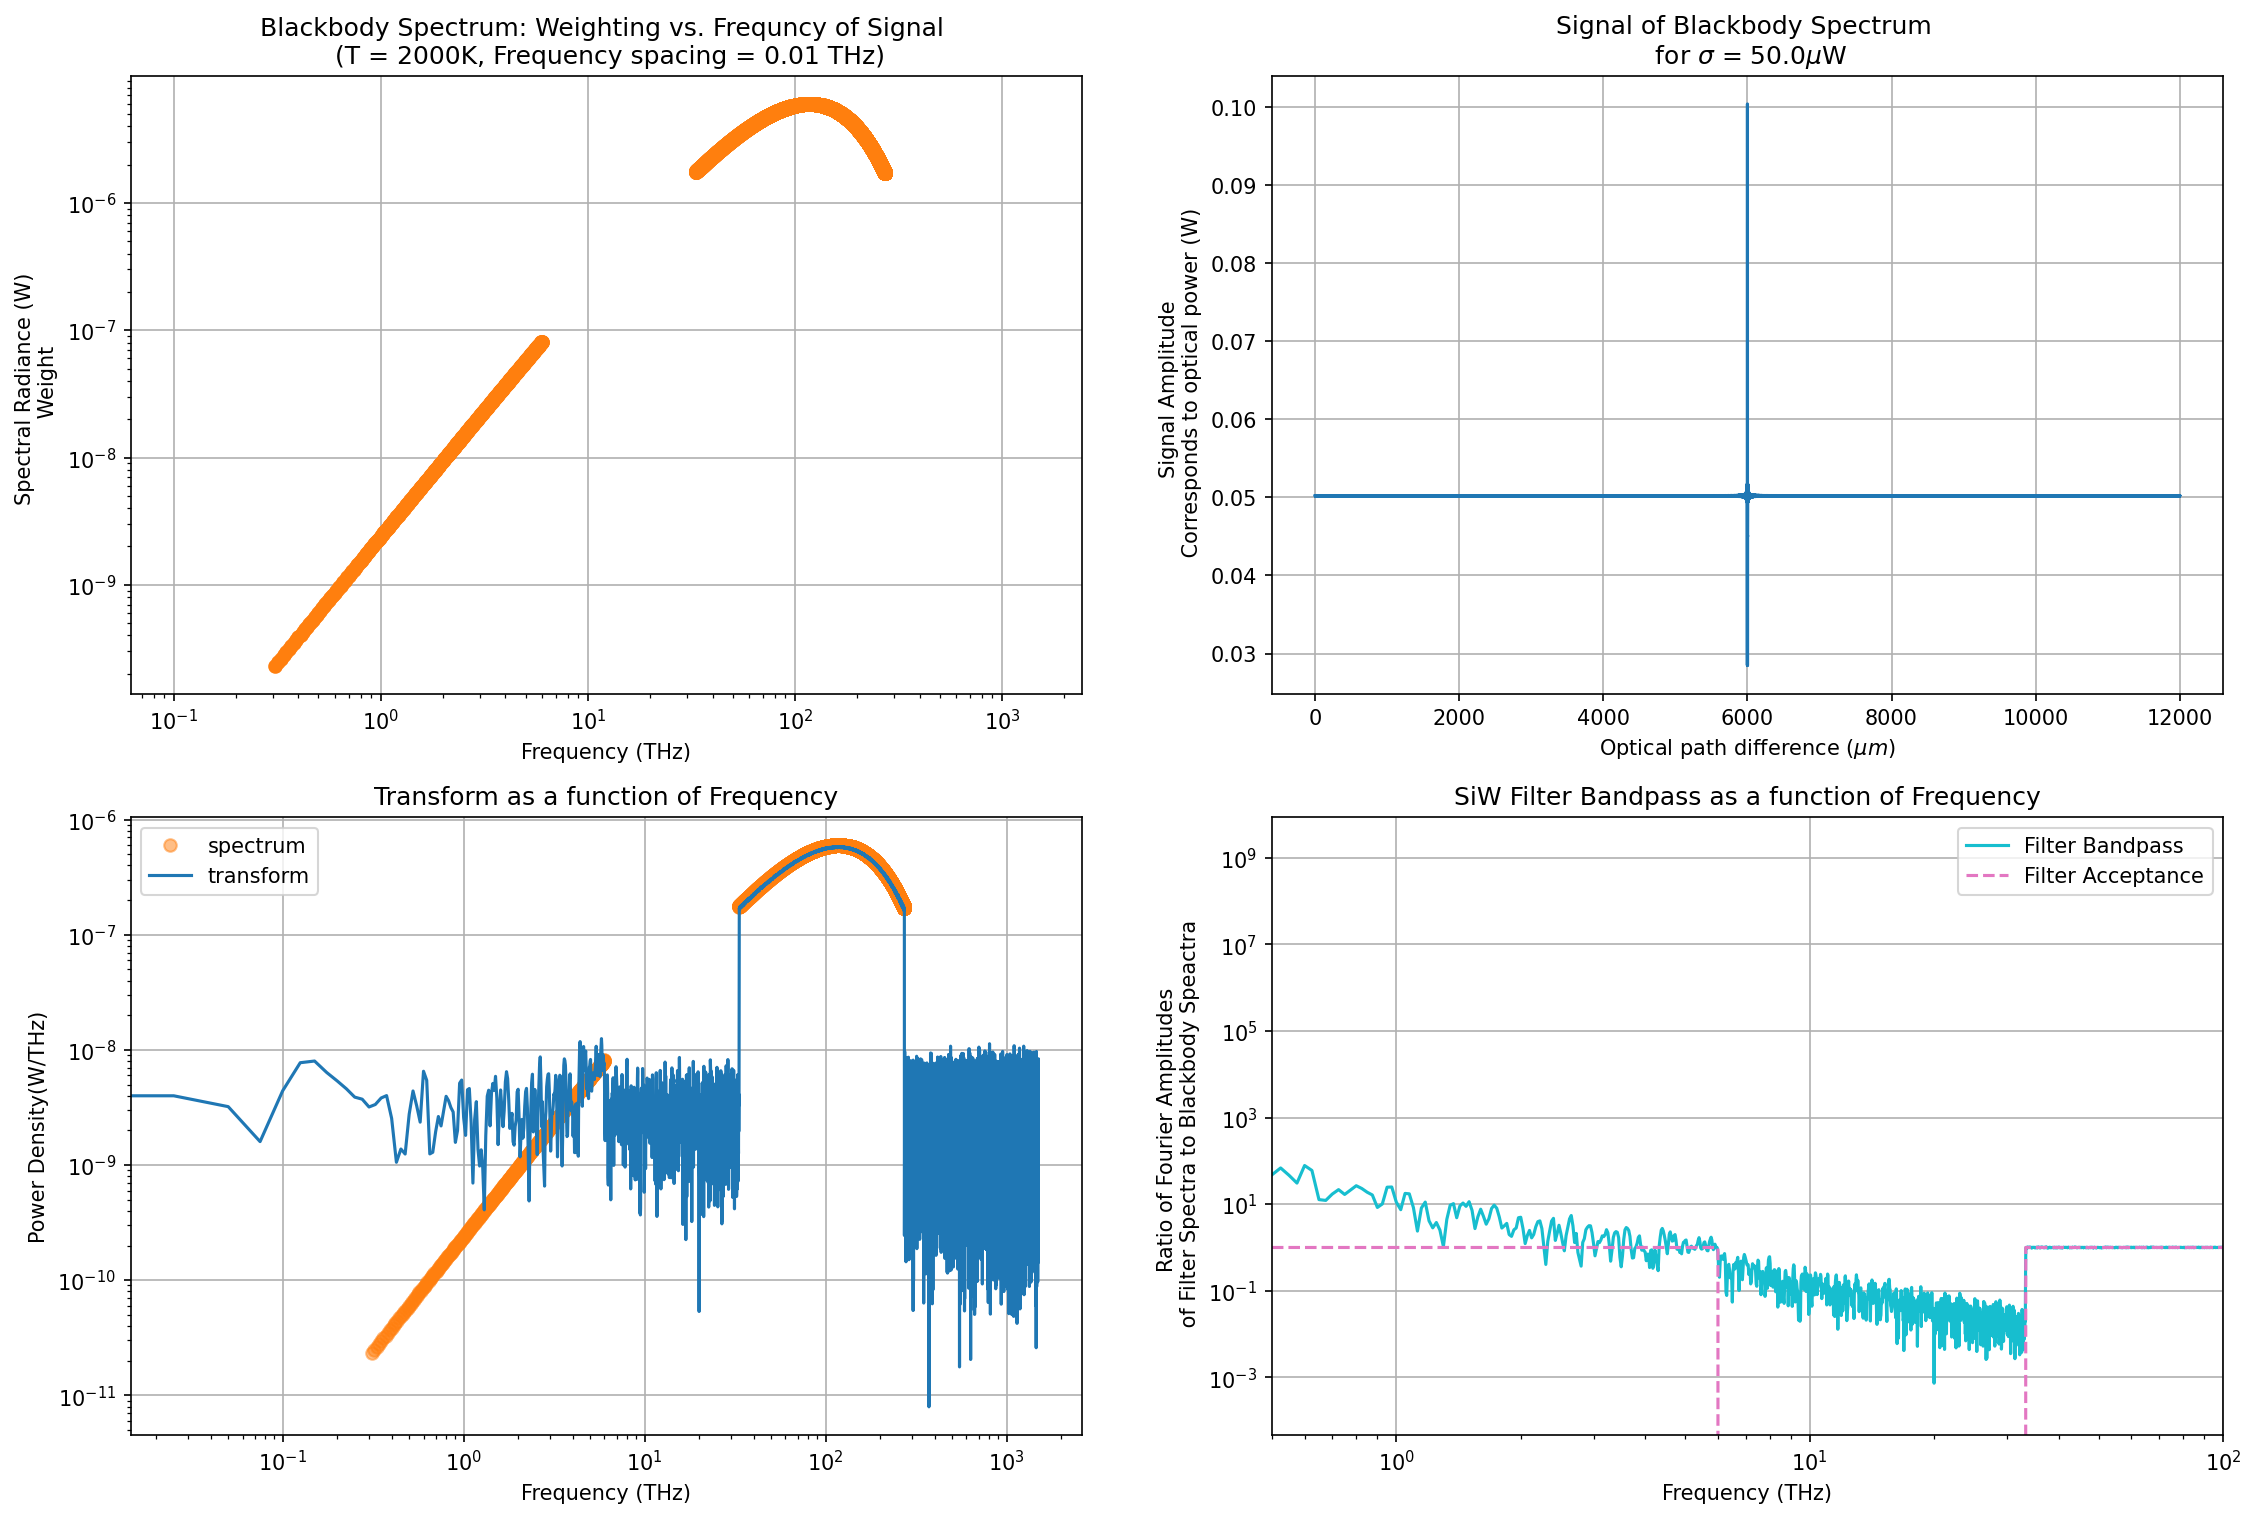

In [33]:
x, y_filter, weights, filter_val = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='SiW')

y_total_SiW = y_filter + np.random.rand(len(x))*sigma

fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(frequencies, weights,  'o', color='C1')

plt.subplot(2, 2, 2)
plt.plot(x,y_total_SiW)

plt.subplot(2, 2, 3)
frequency, spectrum = psd_frequency(y_total_SiW, 'parzen')
plt.semilogy(frequencies, weights/df*1e9, 'o', alpha = 0.5,  label = 'spectrum', color='C1')
plt.semilogy(frequency, spectrum, label='transform', color='C0')

plt.subplot(2, 2, 4)
plt.semilogy(frequency, spectrum/spectrum_nofilter, label = "Filter Bandpass", color='C9')
plt.semilogy(frequencies, filter_val, '--', label = 'Filter Acceptance', color='C6')

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum \n for $\sigma$ = "+ str(round(sigma/1e-6,2)) + "$\mu$W")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Transform as a function of Frequency")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.xlabel('Frequency (THz)')
plt.ylabel("Power Density(W/THz)")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
plt.title("SiW Filter Bandpass as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlim(5e-1, 100)
plt.xlabel('Frequency (THz)')
plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
plt.show()

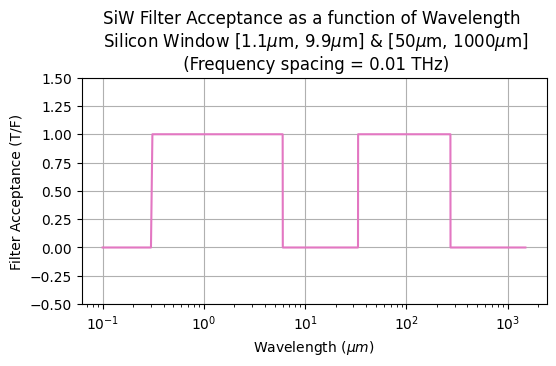

In [34]:
fig = plt.figure(figsize=(6, 3), dpi=100)

plt.plot(frequencies, filter_val, color='C6')
plt.xscale('log')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xscale('log')
title = "SiW Filter Acceptance as a function of Wavelength \n Silicon Window [1.1$\mu$m, 9.9$\mu$m] & [50$\mu$m, 1000$\mu$m] \n (Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Filter Acceptance (T/F)")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

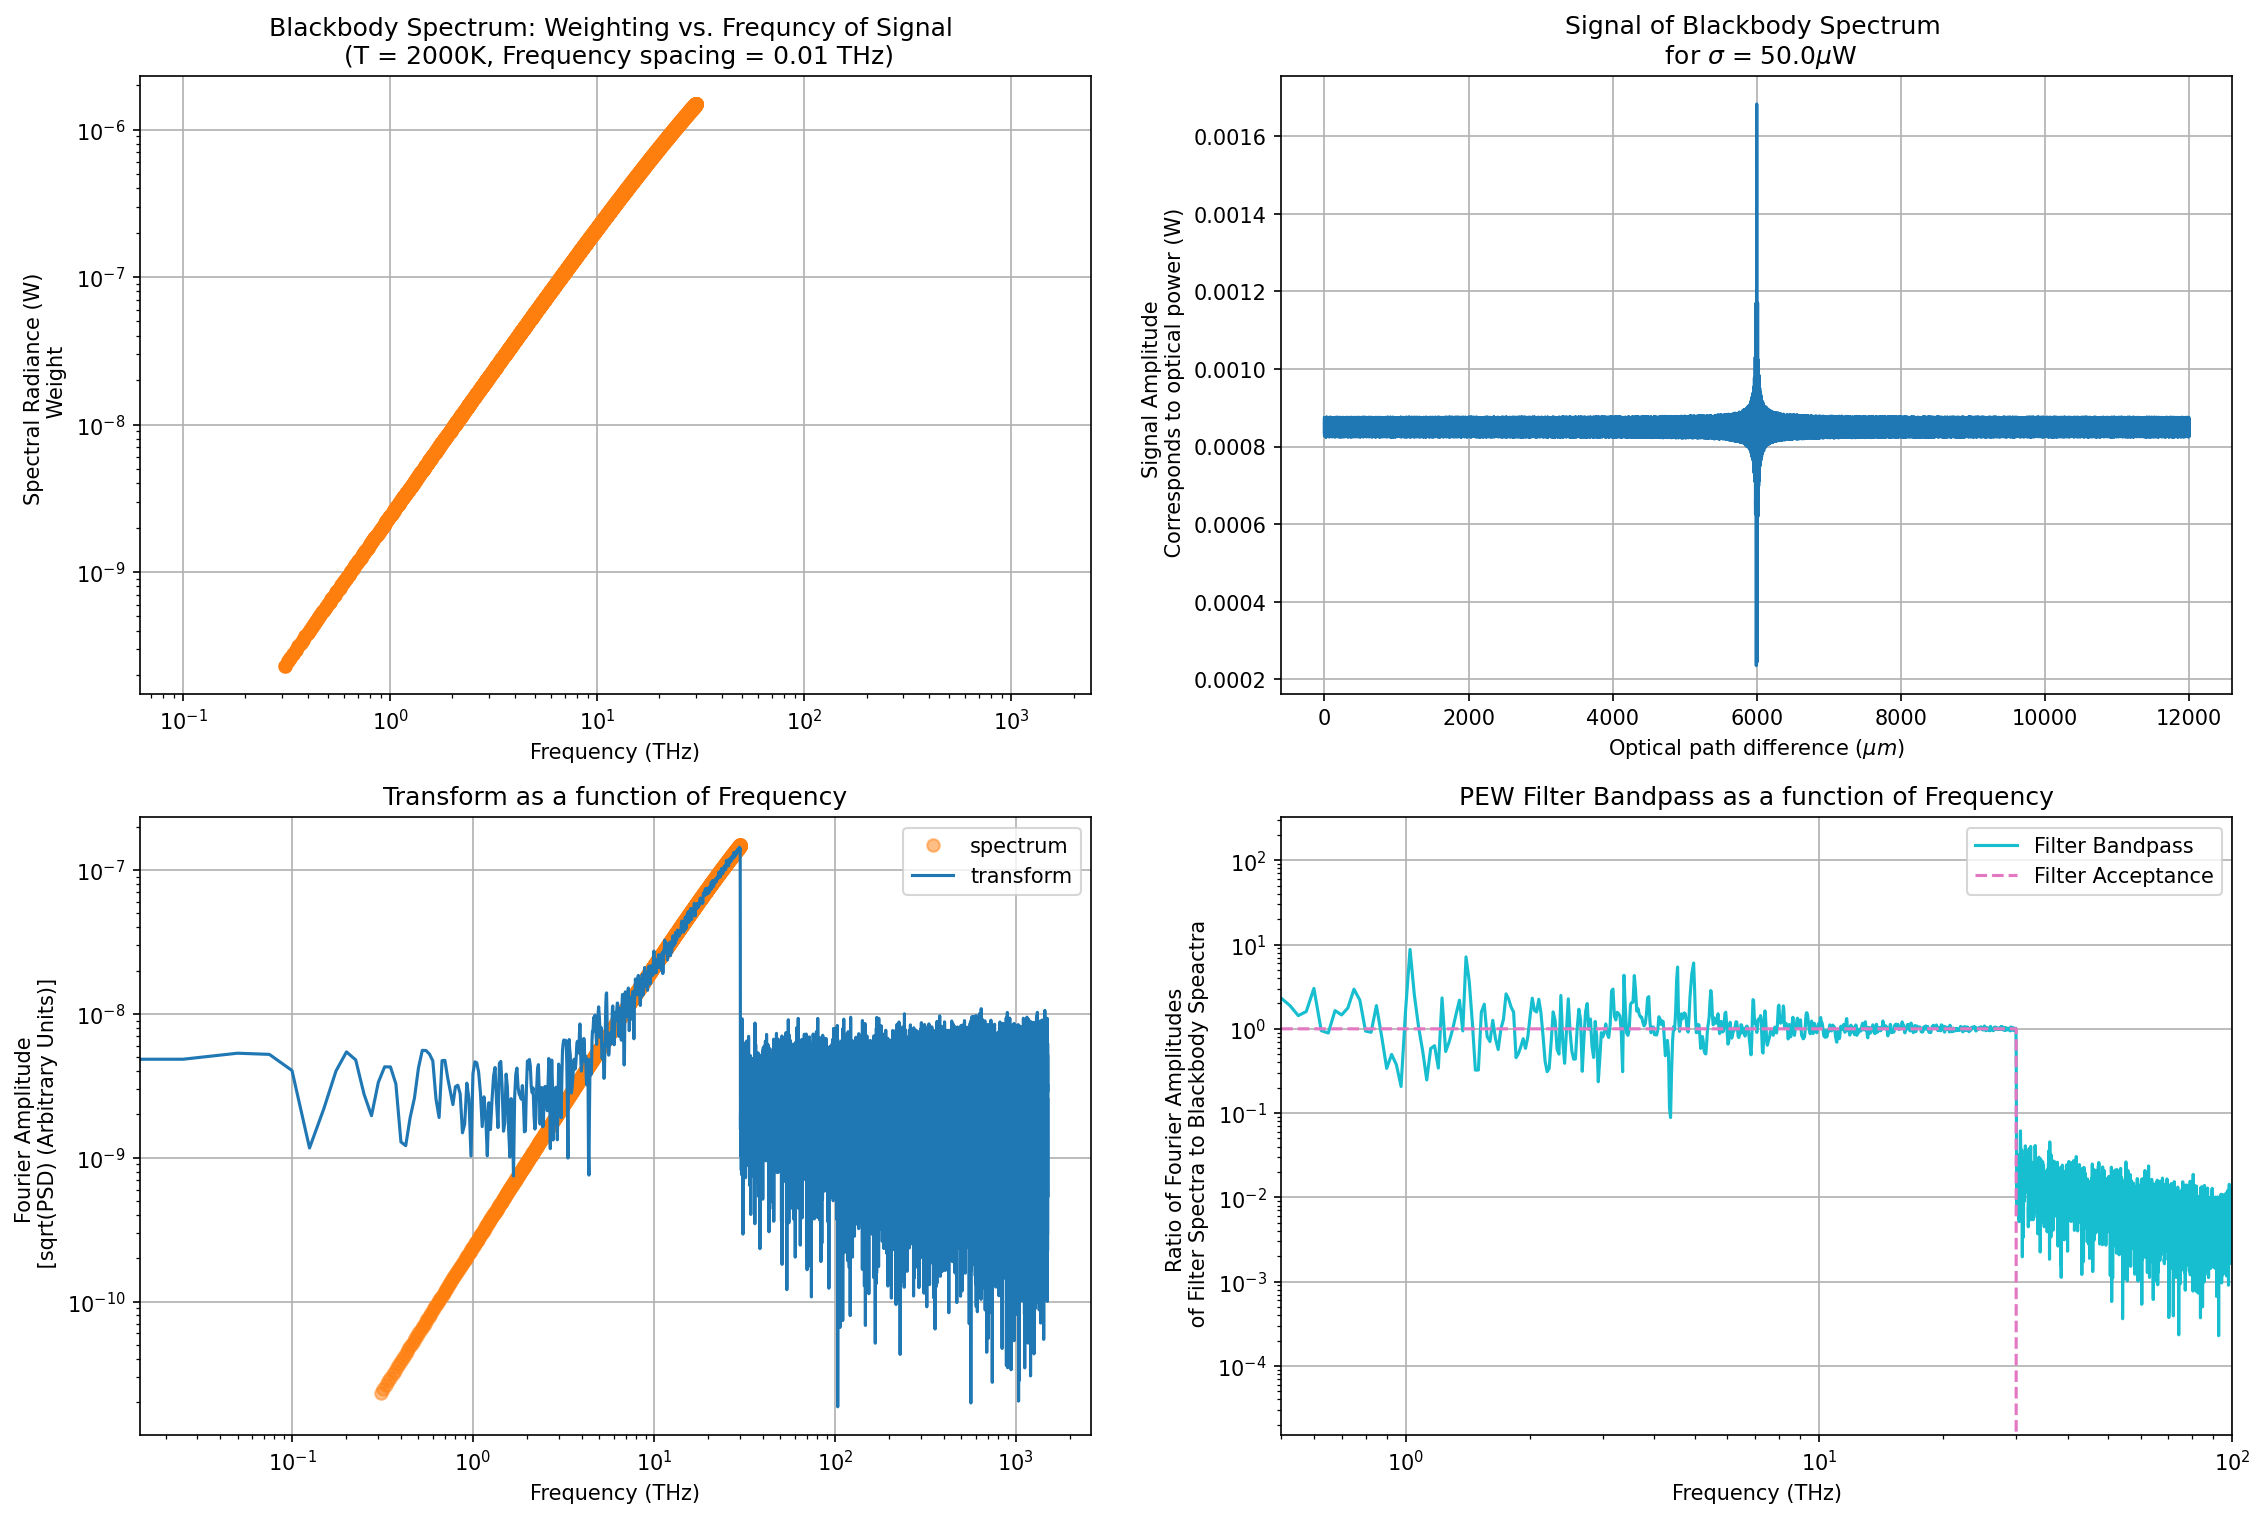

In [35]:
x, y_filter, weights, filter_val = blackbody_input_function(lambda_or_nu, frequencies, frequency_slice_size, filter='PEW')

y_total_PEW = y_filter + np.random.rand(len(x))*sigma

fig = plt.figure(figsize=(18, 12), dpi=150)
plt.subplot(2, 2, 1)
plt.plot(frequencies, weights, 'o' ,color='C1')

plt.subplot(2, 2, 2)
plt.plot(x,y_total_PEW, color = "C0")

plt.subplot(2, 2, 3)
frequency, spectrum = psd_frequency(y_total_PEW, 'parzen')
plt.semilogy(frequencies, weights/df*1e9, 'o', alpha = 0.5, color = "C1", label = 'spectrum')
plt.semilogy(frequency, spectrum, color = "C0", label = 'transform')

plt.subplot(2, 2, 4)
plt.semilogy(frequency, spectrum/spectrum_nofilter_noise, label = "Filter Bandpass", color='C9')
plt.semilogy(frequencies, filter_val, '--', label = 'Filter Acceptance', color='C6')

#plot details for blackbody spectrum plot
plt.subplot(2, 2, 1)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
title = "Blackbody Spectrum: Weighting vs. Frequncy of Signal \n (T = " + str(Temp) + "K, Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Frequency (THz)")
plt.ylabel("Spectral Radiance (W) \n Weight")

#plot details for signal plot
plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Signal of Blackbody Spectrum \n for $\sigma$ = "+ str(round(sigma/1e-6,2)) + "$\mu$W")
plt.xlabel("Optical path difference ($\mu m$)")
plt.ylabel("Signal Amplitude \n Corresponds to optical power (W)")

#plot details for fourier transform plot in terms of frequency rather than wavenumber
plt.subplot(2, 2, 3)
plt.title("Transform as a function of Frequency")
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.xlabel('Frequency (THz)')
plt.ylabel("Fourier Amplitude \n [sqrt(PSD) (Arbitrary Units)]")

#plot details for transfer function (which is power specctrum in frequency for filter/ blackbody~ like dividing out the noise) 
plt.subplot(2, 2, 4)
plt.title("PEW Filter Bandpass as a function of Frequency")
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.xlim(5e-1, 100)
plt.xlabel('Frequency (THz)')
plt.ylabel("Ratio of Fourier Amplitudes \n of Filter Spectra to Blackbody Speactra")
plt.show()

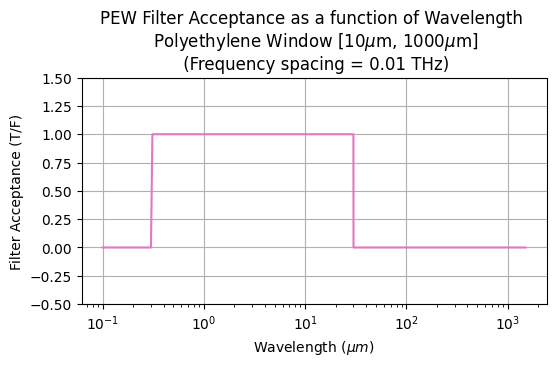

In [36]:
fig = plt.figure(figsize=(6, 3), dpi=100)

plt.plot(frequencies, filter_val, color='C6')
plt.xscale('log')
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xscale('log')
title = "PEW Filter Acceptance as a function of Wavelength \n Polyethylene Window [10$\mu$m, 1000$\mu$m] \n (Frequency spacing = "+ str(round(frequency_slice_size,2)) + " THz)"
plt.title(title)
plt.xlabel("Wavelength ($\mu m$)")
plt.ylabel("Filter Acceptance (T/F)")
plt.show()